In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Bias_correction_ucl.csv")

In [45]:
print (data)

      station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  2013-06-30          28.7          21.4    58.255688   
1         2.0  2013-06-30          31.9          21.6    52.263397   
2         3.0  2013-06-30          31.6          23.3    48.690479   
3         4.0  2013-06-30          32.0          23.4    58.239788   
4         5.0  2013-06-30          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  2017-08-30          23.3          17.1    26.741310   
7748     24.0  2017-08-30          23.3          17.7    24.040634   
7749     25.0  2017-08-30          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   

In [46]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [47]:
data.size

193800

In [48]:
data.shape

(7752, 25)

In [49]:
data.values

array([[1.0, '2013-06-30', 28.7, ..., 5992.895996, 29.1, 21.2],
       [2.0, '2013-06-30', 31.9, ..., 5869.3125, 30.5, 22.5],
       [3.0, '2013-06-30', 31.6, ..., 5863.555664, 31.1, 23.9],
       ...,
       [25.0, '2017-08-30', 23.2, ..., 4451.345215, 27.8, 17.4],
       [nan, nan, 20.0, ..., 4329.520508, 17.4, 11.3],
       [nan, nan, 37.6, ..., 5992.895996, 38.9, 29.8]], dtype=object)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [51]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [52]:
data = data.dropna()

In [53]:
data.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [54]:
def utils_recognize_type(data, col, max_cat=20):
    if (data[col].dtype == "O") | (data[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

#heatmap of variables
dic_cols = {col:utils_recognize_type(data, col, max_cat=20) for col in data.columns}
print(dic_cols)

{'station': 'num', 'Date': 'cat', 'Present_Tmax': 'num', 'Present_Tmin': 'num', 'LDAPS_RHmin': 'num', 'LDAPS_RHmax': 'num', 'LDAPS_Tmax_lapse': 'num', 'LDAPS_Tmin_lapse': 'num', 'LDAPS_WS': 'num', 'LDAPS_LH': 'num', 'LDAPS_CC1': 'num', 'LDAPS_CC2': 'num', 'LDAPS_CC3': 'num', 'LDAPS_CC4': 'num', 'LDAPS_PPT1': 'num', 'LDAPS_PPT2': 'num', 'LDAPS_PPT3': 'num', 'LDAPS_PPT4': 'num', 'lat': 'cat', 'lon': 'num', 'DEM': 'num', 'Slope': 'num', 'Solar radiation': 'num', 'Next_Tmax': 'num', 'Next_Tmin': 'num'}


In [55]:
for x in data.columns:
    print(x)
    if(dic_cols[x]=='num'):
        print("Mean ="+ str(data[x].mean()))
        print("Variance ="+ str(data[x].var()))
        print("Standard Deviation ="+ str(data[x].std()))
   

station
Mean =13.014101212440696
Variance =52.097468191679035
Standard Deviation =7.21785759014952
Date
Present_Tmax
Mean =29.748365840801263
Variance =8.805465893821793
Standard Deviation =2.967400528041638
Present_Tmin
Mean =23.195809172377437
Variance =5.7642239003139055
Standard Deviation =2.4008798179654693
LDAPS_RHmin
Mean =56.72496867696231
Variance =213.93622562016228
Standard Deviation =14.626558912477066
LDAPS_RHmax
Mean =88.3608233703677
Variance =51.83217126898235
Standard Deviation =7.199456317596653
LDAPS_Tmax_lapse
Mean =29.62012769006853
Variance =8.664169071295314
Standard Deviation =2.9434960627280127
LDAPS_Tmin_lapse
Mean =23.511786156327094
Variance =5.4876757717401885
Standard Deviation =2.342578872042559
LDAPS_WS
Mean =7.0940966991598575
Variance =4.739475836556816
Standard Deviation =2.1770337242580364
LDAPS_LH
Mean =62.492606287988
Variance =1134.7572284153769
Standard Deviation =33.686157816162066
LDAPS_CC1
Mean =0.36851020603927254
Variance =0.0687802043361007

In [56]:
data.drop(columns=[
    'lat','Slope',              
'LDAPS_PPT1',         
'DEM',                
'LDAPS_PPT2',         
'LDAPS_PPT4',         
'LDAPS_PPT3',         
'LDAPS_RHmax',        
'LDAPS_WS',           
'LDAPS_RHmin',        
'LDAPS_CC4',          
'LDAPS_CC1',          
'LDAPS_CC2',          
'LDAPS_CC3',
'LDAPS_PPT2',        
'LDAPS_CC1',          
'lon',                
'LDAPS_CC3',          
'LDAPS_LH',           
'LDAPS_PPT3',         
'LDAPS_RHmax',       
'lat',                
'LDAPS_CC4',          
'LDAPS_WS',           
'LDAPS_PPT4',         
'Slope',              
'DEM',
'Date',               
],inplace=True)

<ipython-input-56-6c056cd69209>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=[


In [81]:
data.head()

,station,Present_Tmax,Present_Tmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,28.074101,23.006936,5992.895996,29.1,21.2
1,2.0,31.9,21.6,29.850689,24.035009,5869.312500,30.5,22.5
2,3.0,31.6,23.3,30.091292,24.565633,5863.555664,31.1,23.9
3,4.0,32.0,23.4,29.704629,23.326177,5856.964844,31.7,24.3
4,5.0,31.4,21.9,29.113934,23.486480,5859.552246,31.2,22.5


In [57]:
X = data.drop(['Next_Tmax','Next_Tmin'], axis=1).values
Y = data[['Next_Tmax', 'Next_Tmin']].values


In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)


In [59]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5311, 6)
(5311, 2)
(2277, 6)
(2277, 2)


In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [61]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
model2 = Lasso()
model1 = Ridge(alpha=1.0)
model3 = ElasticNet()
model3.fit(x_train,y_train)
model2.fit(x_train,y_train)
model1.fit(x_train,y_train)

Ridge()

In [62]:
model.score(x_train,y_train)

0.772103232023476

In [63]:
model.score(x_test,y_test)

0.772515765556332

In [64]:
model1.score(x_train,y_train)

0.7721032312438696

In [65]:
model1.score(x_test,y_test)

0.7725148367989916

In [66]:
model2.score(x_train,y_train)

0.7465505464008451

In [67]:
model2.score(x_test,y_test)

0.7416310117275215

In [68]:
model3.score(x_train,y_train)

0.7585846961995877

In [69]:
c = model.intercept_

In [70]:
c

array([ 1.99754774, -1.18676681])

In [71]:
m= model.coef_
m

array([[ 1.41311479e-02,  1.96543836e-01,  1.70712303e-02,
         7.73129717e-01, -2.09784364e-02, -1.14664144e-04],
       [ 7.91787914e-03,  3.93453236e-02,  2.67866863e-01,
         2.51867579e-02,  6.59498785e-01,  6.75244774e-05]])

In [72]:
y_predict_train = model.predict(x_train)

In [73]:
y_predict_train2 = model2.predict(x_train)

In [74]:
y_predict_test = model.predict(x_test)

In [75]:
y_predict_train

array([[31.84922388, 25.43710964],
       [29.77073964, 25.17479616],
       [30.54377929, 22.41700047],
       ...,
       [30.66290308, 24.7889335 ],
       [30.2674747 , 21.28783601],
       [27.78130185, 21.93232096]])

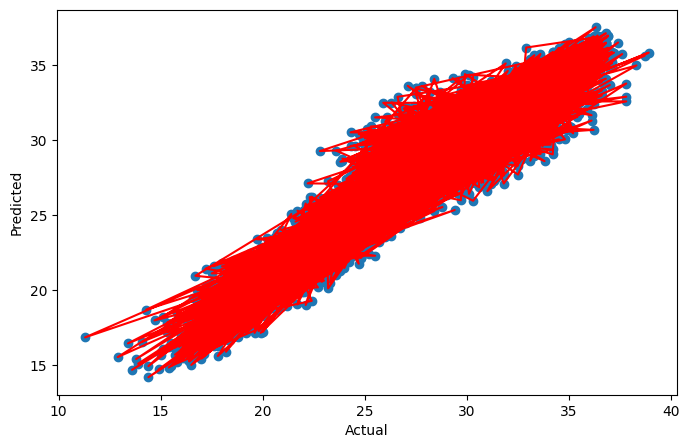

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(y_train,y_predict_train)
plt.plot(y_train,y_predict_train,c='r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

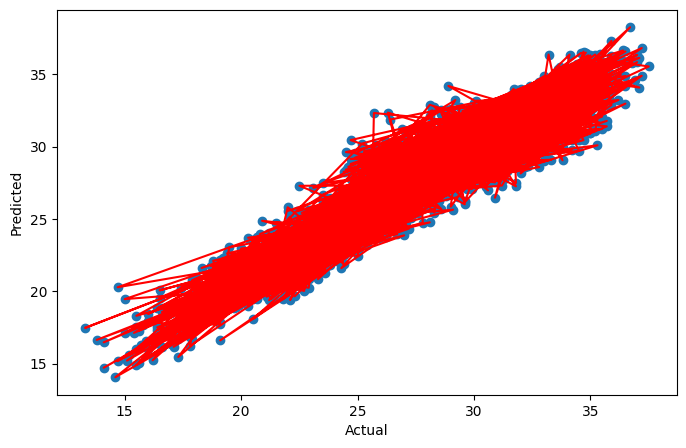

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(y_test,y_predict_test)
plt.plot(y_test,y_predict_test,c='r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [78]:
from sklearn.metrics import r2_score
r2_score(y_train,y_predict_train)

0.772103232023476

In [79]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict_test)

0.772515765556332

In [83]:
model.predict([[1.0,	28.7,	21.4,	28.074101,	23.006936,	5992.895996	]])

array([[28.55291326, 21.96752181]])

In [84]:
model.predict([[2.0,	31.9,	21.6,	29.850689,	24.035009,	5869.312500]])

array([[30.56553514, 22.86933257]])